In [1]:
import numpy as np #type: ignore
import pandas as pd #type: ignore
import matplotlib.pyplot as plt #type: ignore
import seaborn as sns #type: ignore
import os
import warnings #type: ignore
warnings.filterwarnings("ignore")

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/fjrlatacunga/latacunga/main/diabetes_prediction_dataset.csv')

In [4]:
data.shape

(100000, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [8]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [9]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

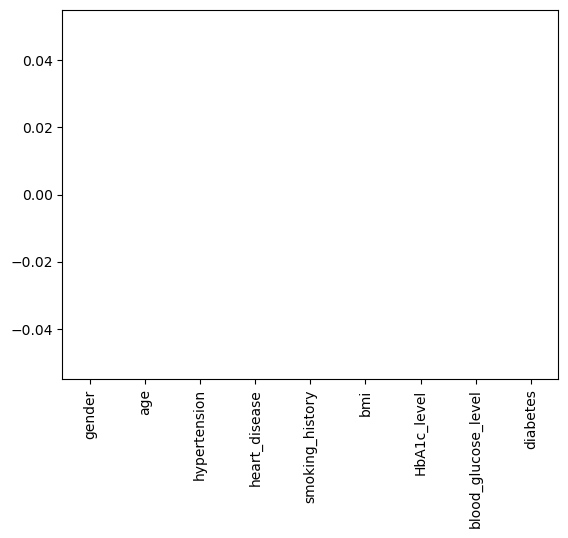

In [10]:
data.isnull().sum().plot(kind='bar')

In [11]:
print ("Número de filas duplicadas :", data.duplicated().sum())

Número de filas duplicadas : 3854


In [12]:
data = data.drop_duplicates() # ! inplace: elimina la columna permanentemente...
print ("Número de filas duplicadas :", data.duplicated().sum())
# Si la columna tiene valores nulos superiores al 30%, por lo que tenemos que eliminar la columna

Número de filas duplicadas : 0


In [13]:
for col in ['gender','smoking_history', 'diabetes'] :
    print (f'Number of Column {col} is: ' , data[col].nunique())
    print (f'Number of Column {col} is: ' , data[col].unique())

Number of Column gender is:  3
Number of Column gender is:  ['Female' 'Male' 'Other']
Number of Column smoking_history is:  6
Number of Column smoking_history is:  ['never' 'No Info' 'current' 'former' 'ever' 'not current']
Number of Column diabetes is:  2
Number of Column diabetes is:  [0 1]


In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['gender'] = label.fit_transform(data['gender'])
data['smoking_history'] = label.fit_transform(data['smoking_history'])
#Codifica las variables tipo categóricas

In [15]:
print(data['smoking_history'].unique(),
       data['gender'].unique())

[4 0 1 3 2 5] [0 1 2]


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int32  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int32  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int32(2), int64(4)
memory usage: 6.6 MB


In [17]:
#data['gender']= data['gender'].replace({"Male":0,"Female":1})
# ? no necesitamos mas esto 
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


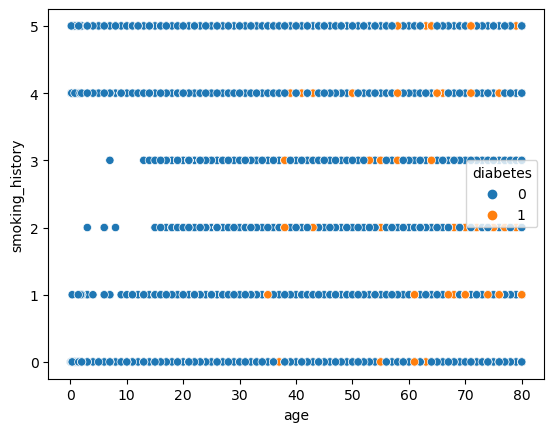

In [18]:
sns.scatterplot(x="age",y="smoking_history",hue='diabetes',data=data)
plt.show()

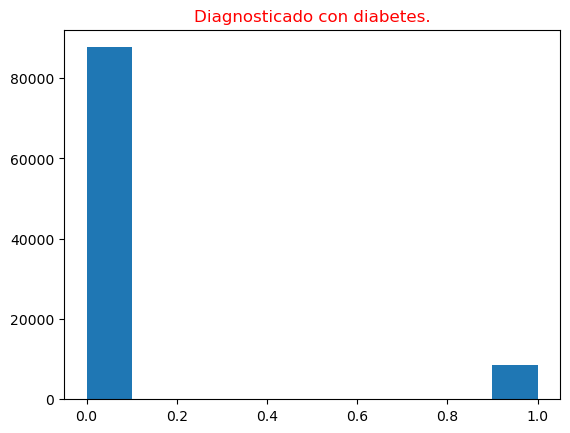

In [19]:
plt.hist(data['diabetes'], bins=10)
plt.title("Diagnosticado con diabetes.", color='r')
plt.show()

In [20]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [21]:
df=pd.DataFrame(data)

In [22]:
df.diabetes

0        0
1        0
2        0
3        0
4        0
        ..
99994    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 96146, dtype: int64

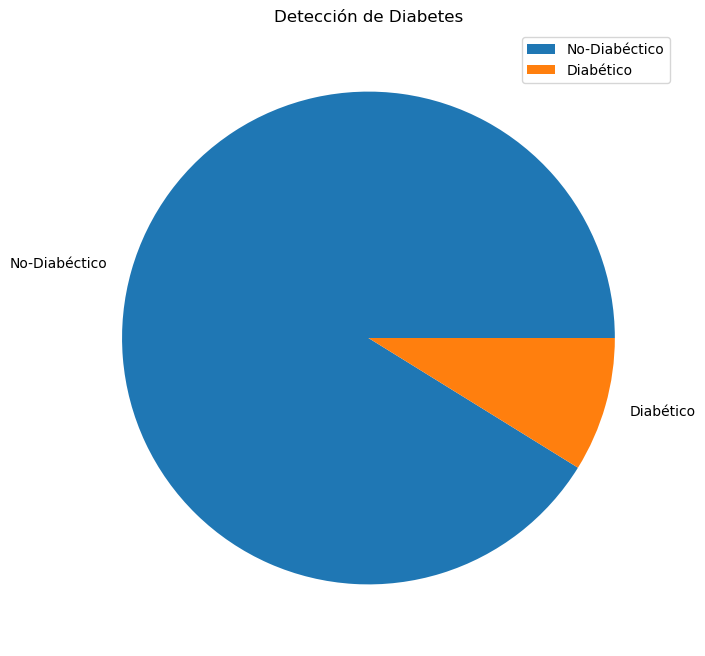

In [23]:
plt.figure(figsize=(8,8))
diabetes_counts=df['diabetes'].value_counts()
Name=['No-Diabéctico','Diabético']
plt.pie(diabetes_counts, labels=Name)
plt.title('Detección de Diabetes')
plt.legend()
plt.show()

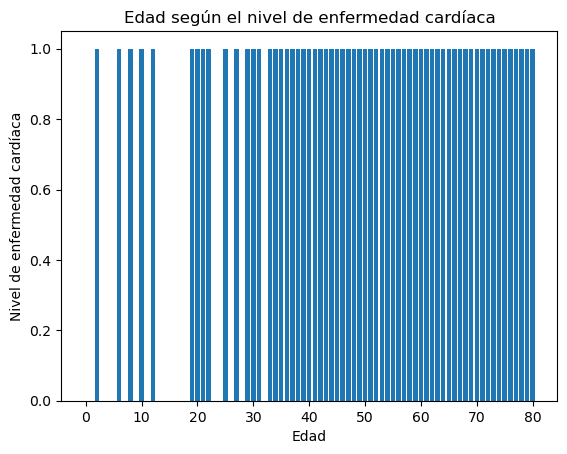

In [24]:
plt.bar(data['age'], data['heart_disease'])
plt.xlabel('Edad')
plt.ylabel('Nivel de enfermedad cardíaca')
plt.title('Edad según el nivel de enfermedad cardíaca')
plt.show()

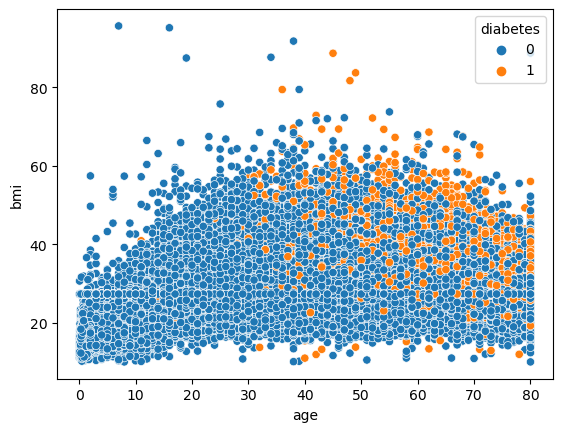

In [25]:
sns.scatterplot(x="age",y= "bmi",hue='diabetes',data= data)
plt.show()

In [52]:
print(data.corr())
data_encoded= pd.get_dummies(data) 
print(pd.get_dummies(data))

                       gender       age  hypertension  heart_disease  \
gender               1.000000 -0.028968      0.014007       0.078312   
age                 -0.028968  1.000000      0.257305       0.238451   
hypertension         0.014007  0.257305      1.000000       0.119982   
heart_disease        0.078312  0.238451      0.119982       1.000000   
smoking_history     -0.079239  0.241128      0.087892       0.023608   
bmi                 -0.023461  0.344797      0.148111       0.061376   
HbA1c_level          0.019836  0.106719      0.081441       0.068140   
blood_glucose_level  0.017830  0.114317      0.084834       0.070832   
diabetes             0.037613  0.264927      0.195710       0.170711   

                     smoking_history       bmi  HbA1c_level  \
gender                     -0.079239 -0.023461     0.019836   
age                         0.241128  0.344797     0.106719   
hypertension                0.087892  0.148111     0.081441   
heart_disease              

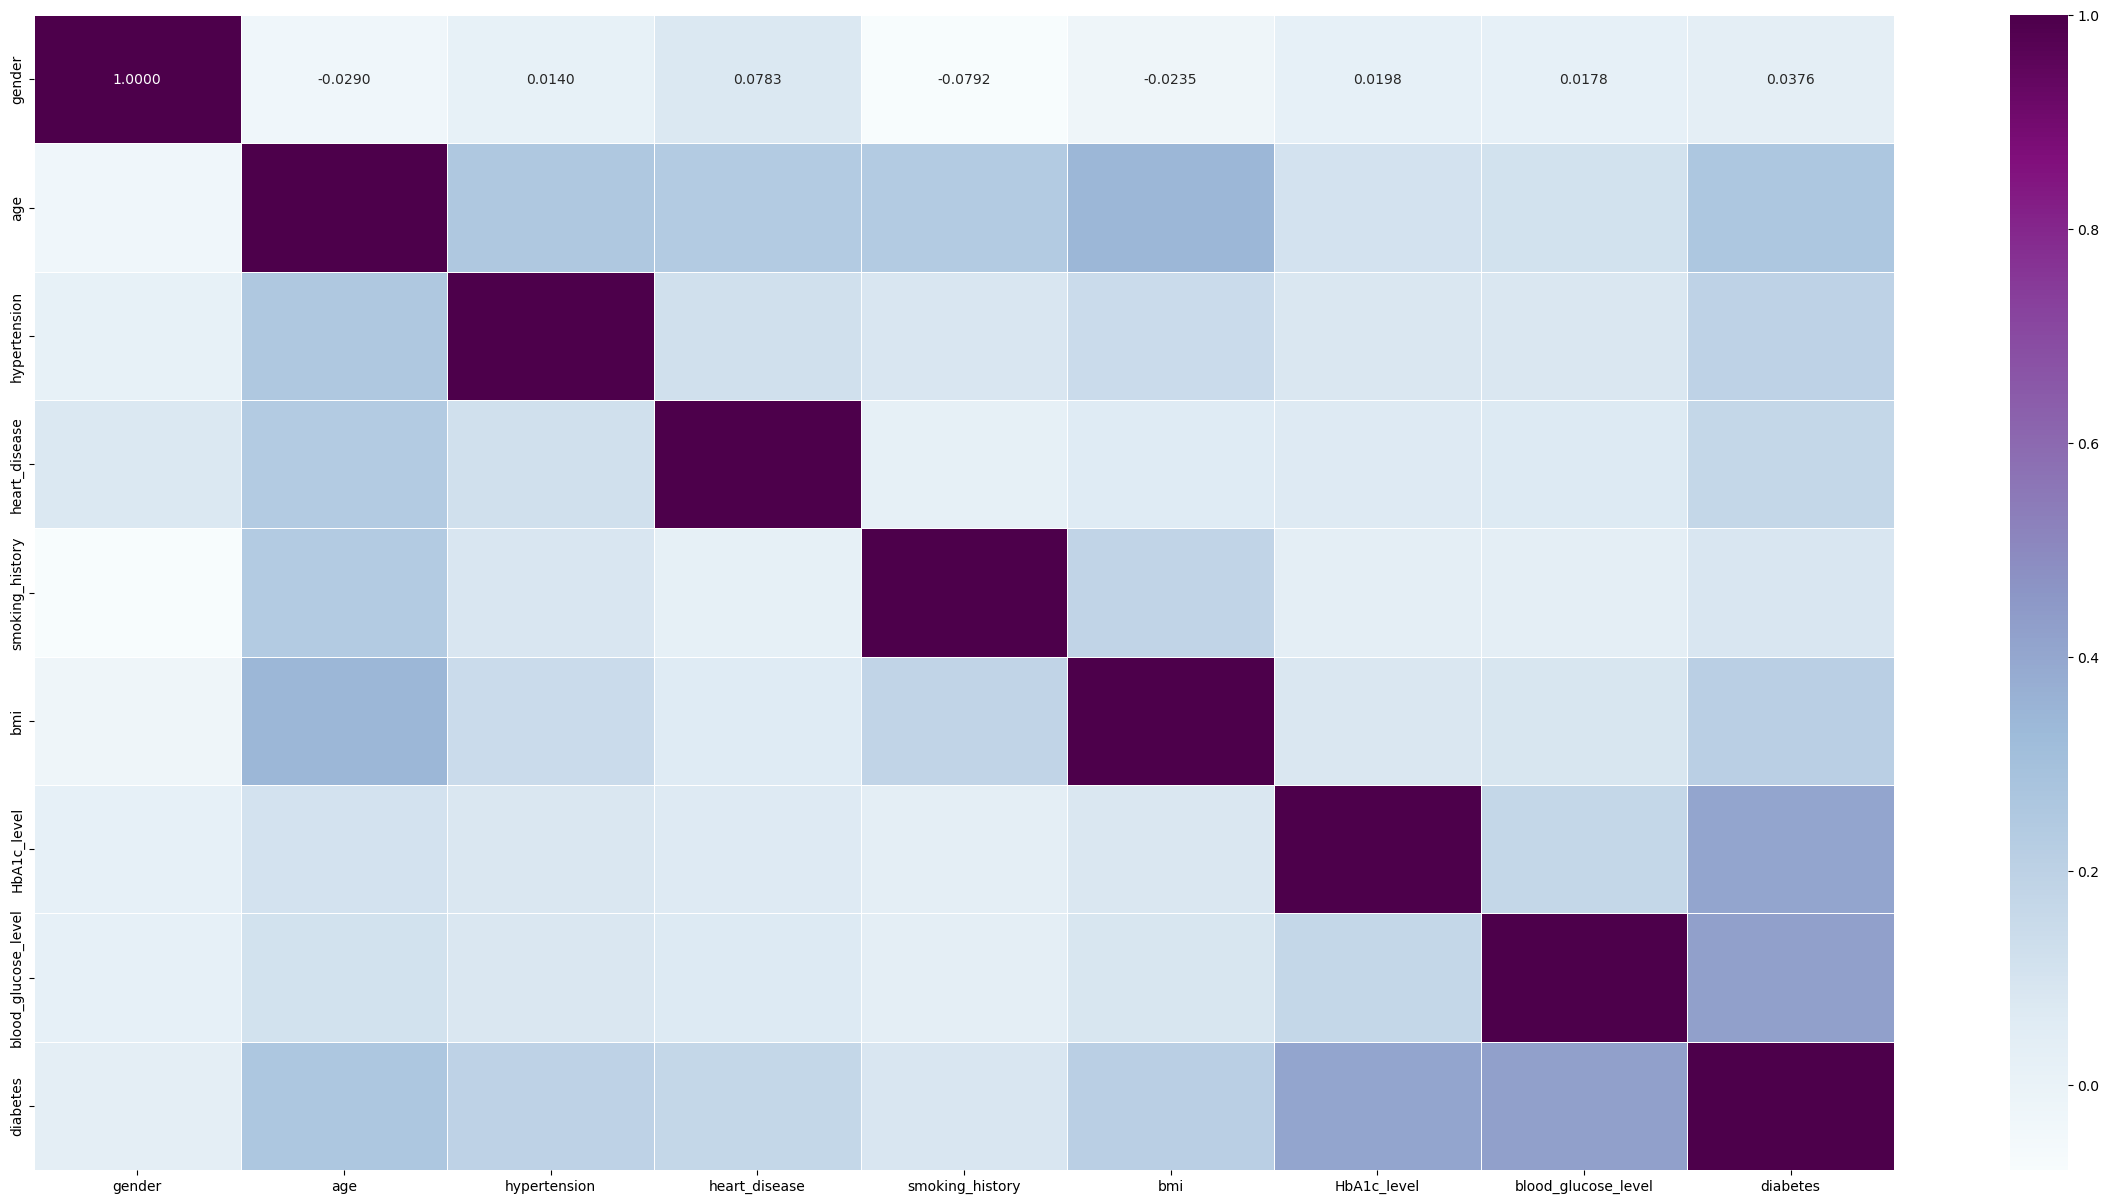

In [50]:
plt.figure(figsize=(30,15))
#data_encoded= pd.get_dummies(data) 
sns.heatmap(data.corr(), annot = True, linewidth="0.5",fmt=".4f",cmap='BuPu')
plt.show()

In [28]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [29]:
x= data.drop(columns=["diabetes"], axis= 1)
y= data["diabetes"] # Target

In [30]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.25, random_state=0,stratify=y)

from imblearn.over_sampling import SMOTE # - To increase the size of the dataset by oversampling.
smote = SMOTE(random_state=42)
# x0, y0 = smote.fit_resample(x, y)
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)
# x_test_resampled, y_test_resampled = smote.fit_resample(x_test, y_test)

In [31]:
x_train.shape, y_train.shape

((72109, 8), (72109,))

In [32]:
x_test.shape , y_test.shape 

((24037, 8), (24037,))

In [33]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DTModel = DecisionTreeClassifier(criterion='gini') 
DTModel.fit(x_train,y_train)
print('DTModel Train Score is : ', DTModel.score(x_train,y_train))
print('DTModel Test Score is : ', DTModel.score(x_test,y_test))

DTModel Train Score is :  0.9992927373836831
DTModel Test Score is :  0.9474560053251238


In [34]:
y_pred = DTModel.predict(x_test)
print('actual Output  : ',(y_test[:15].tolist()))
print('predict output : ',y_pred[:15].tolist())

actual Output  :  [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
predict output :  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [38]:
from sklearn.metrics import classification_report, confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[21209,   707],
       [  556,  1565]], dtype=int64)

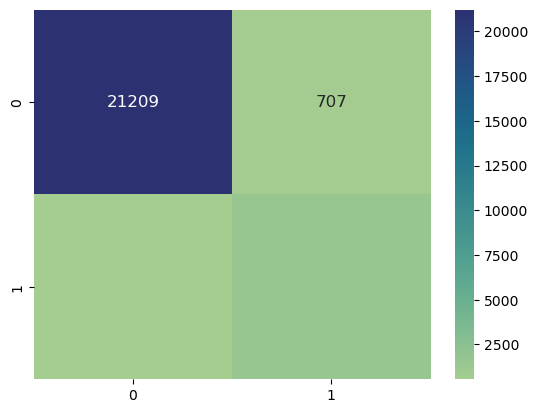

In [39]:
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, fmt="g", cmap="crest")
plt.show()

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     21916
           1       0.69      0.74      0.71      2121

    accuracy                           0.95     24037
   macro avg       0.83      0.85      0.84     24037
weighted avg       0.95      0.95      0.95     24037



In [41]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RFModel = RandomForestClassifier(n_estimators=20, criterion='gini', max_depth=50)
RFModel.fit(x_train, y_train)
print('DTModel Train Score is : ', RFModel.score(x_train, y_train))
print('DTModel Test Score is : ', RFModel.score(x_test, y_test))

DTModel Train Score is :  0.9975176468956718
DTModel Test Score is :  0.967966052335982


In [42]:
y_pred = RFModel.predict(x_test)

In [43]:
print('actual Output  : ', y_test[:15].tolist())
print('predict output : ', y_pred[:15].tolist())

actual Output  :  [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
predict output :  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [44]:
from sklearn.metrics import classification_report ,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[21820,    96],
       [  674,  1447]], dtype=int64)

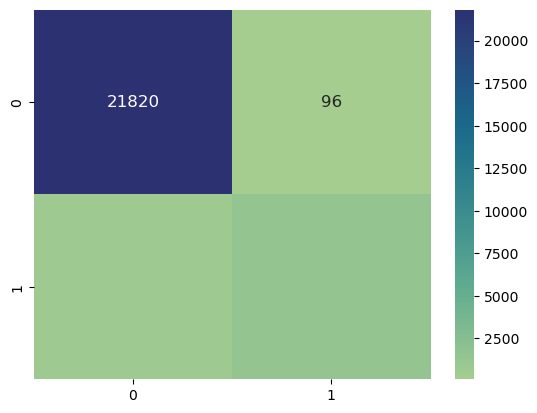

In [45]:
sns.heatmap(cm, annot=True, annot_kws={"size": 12}, fmt="g", cmap="crest")
plt.show()

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     21916
           1       0.94      0.68      0.79      2121

    accuracy                           0.97     24037
   macro avg       0.95      0.84      0.89     24037
weighted avg       0.97      0.97      0.97     24037

